In [1]:
import pandas as pd
from graphviz import Graph
%matplotlib inline

In [2]:
user_names = [
    'Hero',
    'Dunn',
    'Sue',
     'Chi',
    'Thor',
    'Clive',
    'Hicks',
    'Devin',
    'Kate',
    'Klein',
]
assert(len(user_names)) == 10

In [3]:
df = pd.DataFrame(user_names, columns=['name'])
df.index.name = 'id'
df['friends']=[set() for _ in range(len(user_names))]

In [4]:
friendship_data = [
    {0, 1},
    {0, 2},
    {1, 2},
    {1, 3},
    {2, 3},
    {3, 4},
    {4, 5},
    {5, 6},
    {5, 7},
    {6, 8},
    {7, 8},
    {8, 9},
]
assert len(friendship_data) >= len(user_names) -1

In [5]:
for i, j in friendship_data:
    df.iloc[i]['friends'].add(j)
    df.iloc[j]['friends'].add(i)

In [6]:
total_connections = df['friends'].apply(len).sum()

In [7]:
avg_connections = total_connections / len(df.index)

In [8]:
dot = Graph(engine="neato", strict=True, comment="Friendships between Users")

In [9]:
for idx, name, friends in df.itertuples():
    dot.node(str(idx), "{name}({idx})".format(name=name, idx=idx))
    edges = [(str(idx), str(friend)) for friend in friends]
    dot.edges(edges)

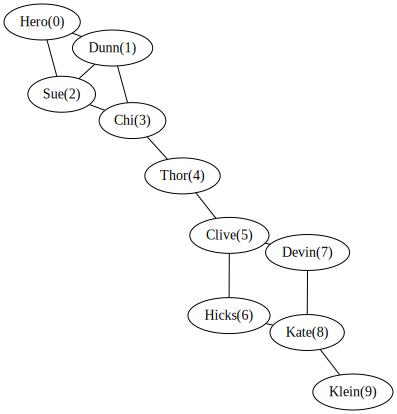

In [10]:
dot

In [19]:
def friend_of_friends(data, user_id):
    """
    Find friends of friends to recommend as new friends.
    
    user_id: id of user receiving recommended friends
    returns: a list of recommended_friends ids, some of which may be duplicates
    """
    friends = list(data.iloc[user_id]['friends'])
    recommended_friends = [fof 
                for friend in friends 
                for fof in df.iloc[friend]["friends"]]
    return __remove_user_or_their_friends(recommended_friends, user_id, friends)

def __remove_user_or_their_friends(recommendations, my_id, my_friends):
    return [x for x in recommendations if x not in my_friends and x is not my_id]

assert set(friend_of_friends(data=df, user_id=0)) == {3}
assert set(friend_of_friends(data=df, user_id=4)) == {1, 2, 6, 7}
assert set(friend_of_friends(data=df, user_id=6)) == {4, 7, 9}
assert set(friend_of_friends(data=df, user_id=9)) == {6, 7}

In [12]:
fof_data = {idx : set(friend_of_friends(df, idx)) for idx, friends in df['friends'].iteritems()}
df['friends of friends']= pd.Series(fof_data)

In [13]:
df

,name,friends,friends of friends
id,,,
0,Hero,"{1, 2}",{3}
1,Dunn,"{0, 2, 3}",{4}
2,Sue,"{0, 1, 3}",{4}
3,Chi,"{1, 2, 4}","{0, 5}"
4,Thor,"{3, 5}","{1, 2, 6, 7}"
5,Clive,"{4, 6, 7}","{8, 3}"
6,Hicks,"{8, 5}","{9, 4, 7}"
7,Devin,"{8, 5}","{9, 4, 6}"
8,Kate,"{9, 6, 7}",{5}


In [33]:
from collections import Counter
fof_count_data = {idx : Counter(friend_of_friends(df, idx)) for idx, friends in df['friends'].iteritems()}
df['fof counts'] = pd. Series(fof_count_data)

assert df['fof counts'].iloc[3] == {0:2, 5:1}

In [34]:
df

,name,friends,friends of friends,fof counts
id,,,,
0,Hero,"{1, 2}",{3},{3: 2}
1,Dunn,"{0, 2, 3}",{4},{4: 1}
2,Sue,"{0, 1, 3}",{4},{4: 1}
3,Chi,"{1, 2, 4}","{0, 5}","{0: 2, 5: 1}"
4,Thor,"{3, 5}","{1, 2, 6, 7}","{1: 1, 2: 1, 6: 1, 7: 1}"
5,Clive,"{4, 6, 7}","{8, 3}","{3: 1, 8: 2}"
6,Hicks,"{8, 5}","{9, 4, 7}","{9: 1, 7: 2, 4: 1}"
7,Devin,"{8, 5}","{9, 4, 6}","{9: 1, 6: 2, 4: 1}"
8,Kate,"{9, 6, 7}",{5},{5: 2}


In [35]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [78]:
grouped_interests = {}
for idx, interest in interests:
    grouped_interests[idx] = grouped_interests.get(idx, []) + [interest]
grouped_interests

{0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'],
 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
 2: ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'],
 3: ['R', 'Python', 'statistics', 'regression', 'probability'],
 4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
 5: ['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages'],
 6: ['statistics', 'probability', 'mathematics', 'theory'],
 7: ['machine learning', 'scikit-learn', 'Mahout', 'neural networks'],
 8: ['neural networks',
  'deep learning',
  'Big Data',
  'artificial intelligence'],
 9: ['Hadoop', 'Java', 'MapReduce', 'Big Data']}

In [82]:
df['interests'] = pd.Series(data=grouped_interests)

In [83]:
df

,name,friends,friends of friends,fof counts,interests
id,,,,,
0,Hero,"{1, 2}",{3},{3: 2},"[Hadoop, Big Data, HBase, Java, Spark, Storm, ..."
1,Dunn,"{0, 2, 3}",{4},{4: 1},"[NoSQL, MongoDB, Cassandra, HBase, Postgres]"
2,Sue,"{0, 1, 3}",{4},{4: 1},"[Python, scikit-learn, scipy, numpy, statsmode..."
3,Chi,"{1, 2, 4}","{0, 5}","{0: 2, 5: 1}","[R, Python, statistics, regression, probability]"
4,Thor,"{3, 5}","{1, 2, 6, 7}","{1: 1, 2: 1, 6: 1, 7: 1}","[machine learning, regression, decision trees,..."
5,Clive,"{4, 6, 7}","{8, 3}","{3: 1, 8: 2}","[Python, R, Java, C++, Haskell, programming la..."
6,Hicks,"{8, 5}","{9, 4, 7}","{9: 1, 7: 2, 4: 1}","[statistics, probability, mathematics, theory]"
7,Devin,"{8, 5}","{9, 4, 6}","{9: 1, 6: 2, 4: 1}","[machine learning, scikit-learn, Mahout, neura..."
8,Kate,"{9, 6, 7}",{5},{5: 2},"[neural networks, deep learning, Big Data, art..."
